### **1. HSHT Quantum Circuit (Single Qubit)**

In [2]:
# --- Import required modules ---
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

# Create HSHT circuit
qc_hsht = QuantumCircuit(1, name='HSHT')

qc_hsht.h(0)
qc_hsht.s(0)
qc_hsht.h(0)
qc_hsht.t(0)

print("HSHT Circuit:")
print(qc_hsht.draw())

# Initialize simulator
sim = AerSimulator()

# --- Check outputs for |0> and |1> inputs ---
state_0 = Statevector.from_label('0')
output_0 = state_0.evolve(qc_hsht)
print("\nOutput for |0>:\n", output_0)

state_1 = Statevector.from_label('1')
output_1 = state_1.evolve(qc_hsht)
print("\nOutput for |1>:\n", output_1)

# --- Check reversibility (HSHT followed by its inverse) ---
inverse = qc_hsht.inverse()
combined = qc_hsht.compose(inverse)

print("\nCombined circuit (HSHT followed by its inverse):")
print(combined.draw())

reversibility_check = state_0.evolve(combined)
print("\nAfter applying HSHT and its inverse on |0>:\n", reversibility_check)


HSHT Circuit:
   ┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

Output for |0>:
 Statevector([0.5       +0.5j, 0.70710678+0.j ],
            dims=(2,))

Output for |1>:
 Statevector([0.5-0.5j       , 0. +0.70710678j],
            dims=(2,))

Combined circuit (HSHT followed by its inverse):
   ┌───┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌─────┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├┤ Tdg ├┤ H ├┤ Sdg ├┤ H ├
   └───┘└───┘└───┘└───┘└─────┘└───┘└─────┘└───┘

After applying HSHT and its inverse on |0>:
 Statevector([1.+0.00000000e+00j, 0.+7.85046229e-17j],
            dims=(2,))


### **2. H + CNOT Circuit (Bell States)**

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create the Bell-state generating circuit
qc_bell = QuantumCircuit(2, name='Bell_State')
qc_bell.h(0)
qc_bell.cx(0, 1)

print("\nBell State Circuit:")
print(qc_bell.draw())

# --- Check outputs for all 4 basis states ---
for basis in ['00', '01', '10', '11']:
    state = Statevector.from_label(basis)
    output = state.evolve(qc_bell)
    print(f"\nInput |{basis}> → Output statevector:\n", output)



Bell State Circuit:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Input |00> → Output statevector:
 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

Input |01> → Output statevector:
 Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))

Input |10> → Output statevector:
 Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))

Input |11> → Output statevector:
 Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


### **3. Visualization**

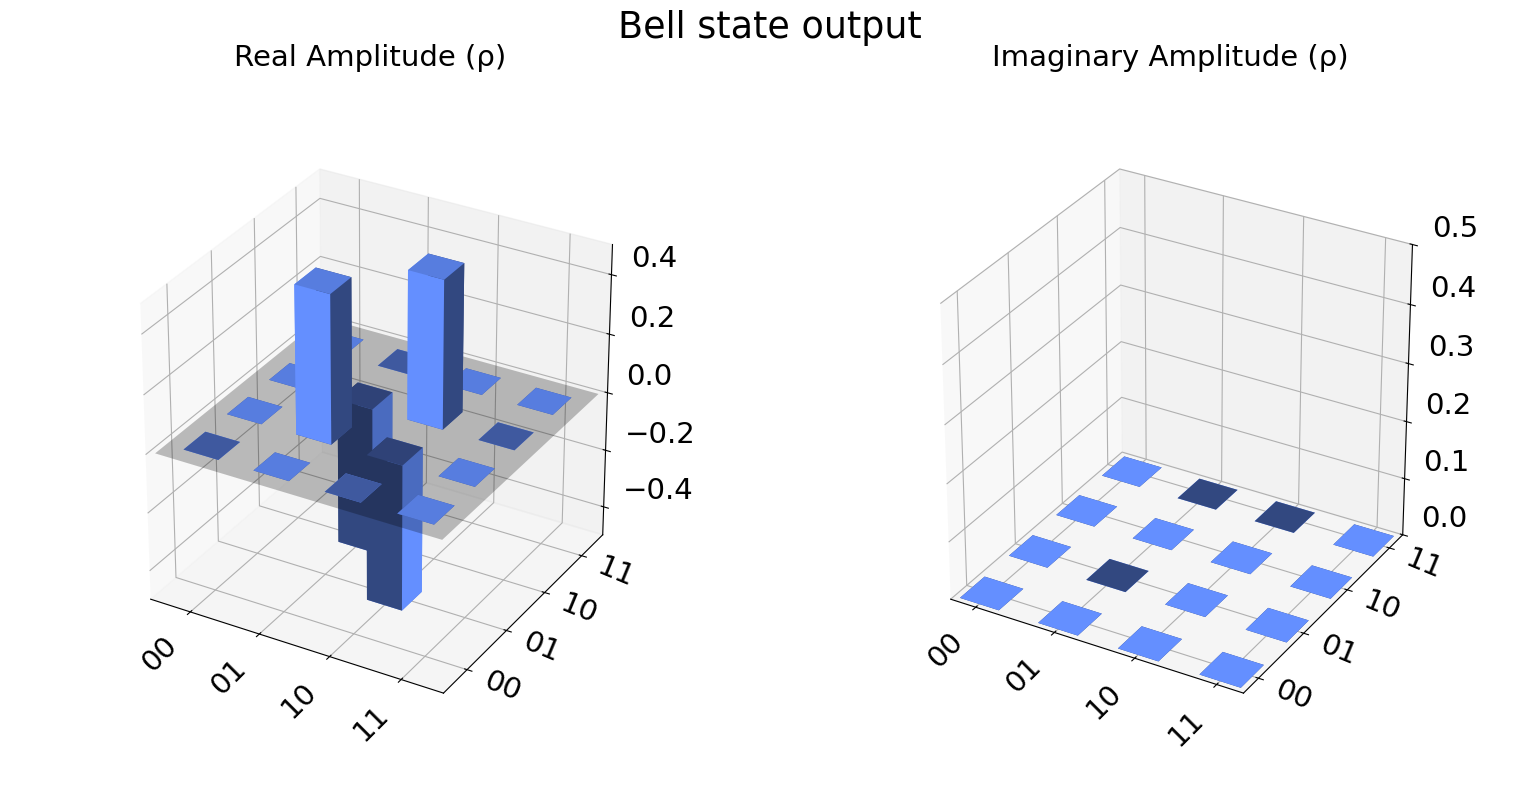

In [4]:
from qiskit.visualization import plot_bloch_multivector, plot_state_city

plot_bloch_multivector(output_0.data)  # For HSHT output |0>
plot_state_city(output.data, title="Bell state output")  # For Bell states


### **4. Summary**
- The HSHT circuit transforms ∣0⟩ and ∣1⟩ into distinct superposition states with complex phases.

- The outputs confirm that HSHT is unitary and therefore reversible.

- Applying the inverse of HSHT returns the qubit to its original state.

- Bloch sphere visualization shows the qubit moving from the poles to points representing superpositions.

- The H + CNOT circuit generates maximally entangled Bell states from computational basis inputs.

- Statevector visualization confirms perfect correlation between the two qubits, demonstrating entanglement.

- These experiments highlight fundamental quantum principles: reversible operations and entanglement generation.